In [33]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols, rlm
import matplotlib.pyplot as plt
from patsy import dmatrix
%matplotlib inline

## Carrega dados do FMI referentes ao Brasil

In [2]:
df = pd.read_csv("../data/brazil_gdp_inflation_ir.csv", dtype={'Time':np.float64, 'GDP':np.float64, 'Inflation':np.float64, 'Interest':np.float64}, index_col="Time")

#### Exibimos série histórica

In [3]:
df['RInterest'] = df.Interest - df.Inflation
brazil = df.sort()
brazil

,GDP,Inflation,Interest,RInterest
Time,,,,
1981,-4.233655,101.724821,NaN,NaN
1982,0.817012,100.543498,NaN,NaN
1983,-2.930728,135.027595,NaN,NaN
1984,6.358646,192.121770,NaN,NaN
1985,7.526882,225.991556,NaN,NaN
1986,7.000000,147.142166,NaN,NaN
1987,3.380561,228.335135,NaN,NaN
1988,-0.059936,629.114727,NaN,NaN
1989,4.024481,1430.723231,NaN,NaN


##Regressão entre taxa de inflação e taxa de crescimento do PIB

Como já evidenciado em outros estudos [[1](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.197.5261&rep=rep1&type=pdf)] [[2](https://www.imf.org/external/pubs/cat/longres.cfm?sk=1873.0)] [[3](http://courses.umass.edu/econ797a-rpollin/Bruno%201995%20paper.pdf)] e [[4](http://research.stlouisfed.org/publications/review/96/05/9605mb.pdf)] não existe correlação negativa entre inflação e crescimento para valores de inflação de até 10%, mesmo no Brasil.

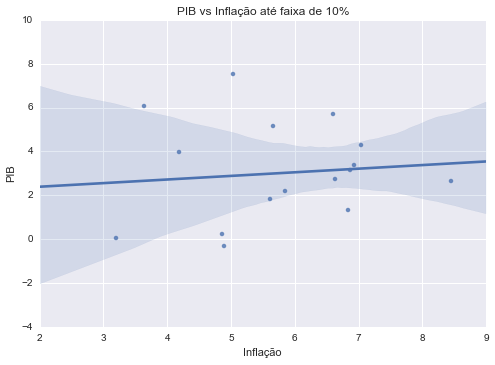

In [4]:
filter = brazil.Inflation < 11.0
sns.set(style="darkgrid")
plt.title(u"PIB vs Inflação até faixa de 10%")
ax = sns.regplot(brazil[filter].Inflation, brazil[filter].GDP, robust=True, n_boot=500)
ax.set_xlabel(u"Inflação")
ax.set_ylabel(u"PIB")

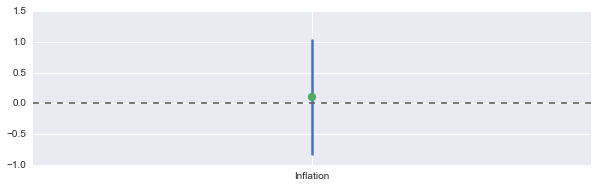

In [5]:
sns.coefplot("GDP ~ Inflation", data=brazil[filter])

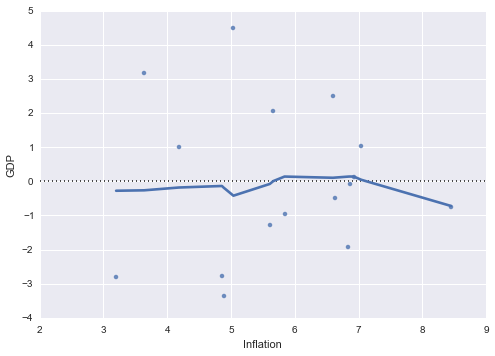

In [6]:
sns.residplot(brazil[brazil.Inflation < 11.0].Inflation, brazil[brazil.Inflation < 11.0].GDP, lowess=True)

## Regressão entre taxa de juros e inflação

Um estudo recente [[4](http://www.scielo.br/scielo.php?pid=S0101-31572014000100001&script=sci_arttext)] aponta para a falta de evidências nas explicações frequentemente fornecidas para que as taxas de juros no Brasil precisem ser tão altas e por tão longo tempo e sugerem:
> *Hence a wise central bank should consider "testing" the market to make sure it is not dealing with an extreme equilibrium configuration or a long standing disequilibrium.*

Inpirado pelos 4 estudos citados até aqui resolvemos verificar a correlação entre taxas de juros e inflação nos patamares de até 10%.

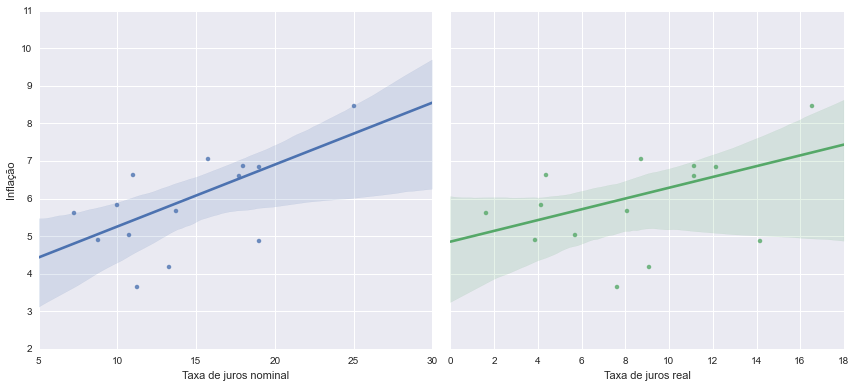

In [7]:
filter = brazil.Inflation < 11.0
color = sns.color_palette()[2]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
sns.regplot(brazil[filter].Interest, brazil[filter].Inflation, robust=True, n_boot=500, ax=ax1)
sns.regplot(brazil[filter].RInterest, brazil[filter].Inflation, robust=True, n_boot=500, ax=ax2).set_ylabel("")
ax1.set_xlabel(u"Taxa de juros nominal")
ax2.set_xlabel(u"Taxa de juros real")
ax1.set_ylabel(u"Inflação")

f.tight_layout()

Note inflação correlaciona positivamente com taxa de juros, porém isso se explica pelo fato de se subir os juros
quando se entende que inflação está elevada. Alega-se em geral que variações nas taxas de juros levam ao
menos 6 meses para atuarem sobre o mercado, assim nas próximas seções fazemos um shift de um e dois anos sobre a taxa de juros.

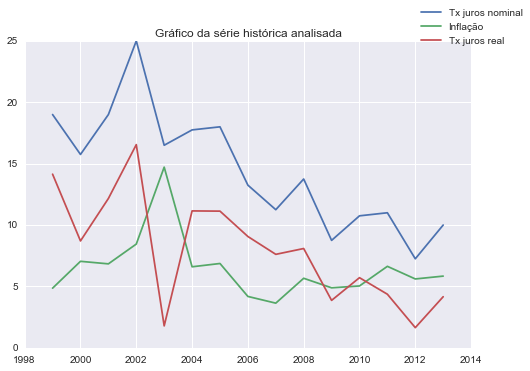

In [8]:
f = plt.figure()
filter = brazil.index > 1998
l1, = plt.plot(brazil[filter].index, brazil[filter].Interest, figure=f, label=u"Tx juros nominal")
l2, = plt.plot(brazil[filter].index, brazil[filter].Inflation, figure=f, label=u"Inflação")
l3, = plt.plot(brazil[filter].index, brazil[filter].RInterest, figure=f, label=u"Tx juros real")
f.legend(handles=[l1,l2,l3], labels=[u"Tx juros nominal",u"Inflação", u"Tx juros real"])
plt.title(u"Gráfico da série histórica analisada")
#f.tight_layout()

In [9]:
brazil[filter].describe()

,GDP,Inflation,Interest,RInterest
count,15.000000,15.000000,15.000000,15.000000
mean,3.179867,6.457678,14.466667,8.008988
std,2.259167,2.601816,4.810579,4.464531
min,-0.330000,3.637028,7.250000,1.641648
25%,1.565658,4.962363,10.875000,4.262114
50%,2.730000,5.839574,13.750000,8.086901
75%,4.738093,6.852590,17.875000,11.141763
max,7.530000,14.715326,25.000000,16.549779


## Regressão entre taxa de juros e inflação no ano seguinte.

Shift de um ano na taxa de juros.

In [10]:
del filter
brazil_ir_s1 = brazil.copy()
brazil_ir_s1.Interest = brazil.Interest.shift(1)
brazil_ir_s1.RInterest = brazil.RInterest.shift(1)

Sanity check

In [11]:
brazil_ir_s1

,GDP,Inflation,Interest,RInterest
Time,,,,
1981,-4.233655,101.724821,NaN,NaN
1982,0.817012,100.543498,NaN,NaN
1983,-2.930728,135.027595,NaN,NaN
1984,6.358646,192.121770,NaN,NaN
1985,7.526882,225.991556,NaN,NaN
1986,7.000000,147.142166,NaN,NaN
1987,3.380561,228.335135,NaN,NaN
1988,-0.059936,629.114727,NaN,NaN
1989,4.024481,1430.723231,NaN,NaN


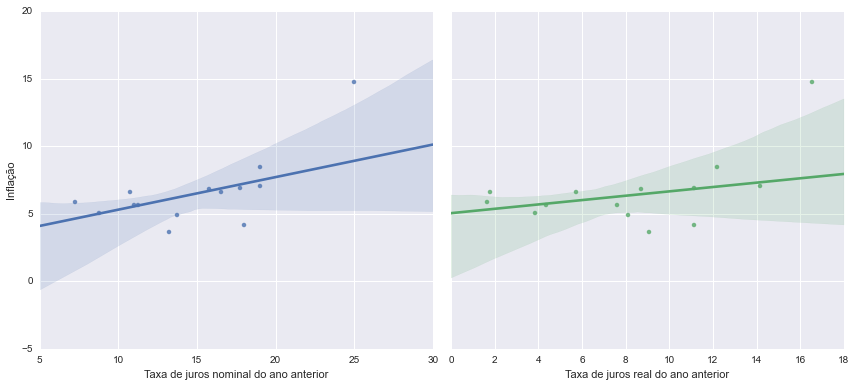

In [12]:
color = sns.color_palette()[2]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
sns.regplot(brazil_ir_s1.Interest, brazil_ir_s1.Inflation, robust=True, n_boot=500, ax=ax1)
sns.regplot(brazil_ir_s1.RInterest, brazil_ir_s1.Inflation, robust=True, n_boot=500, ax=ax2).set_ylabel("")
ax1.set_xlabel(u"Taxa de juros nominal do ano anterior")
ax2.set_xlabel(u"Taxa de juros real do ano anterior")
ax1.set_ylabel(u"Inflação")

f.tight_layout()

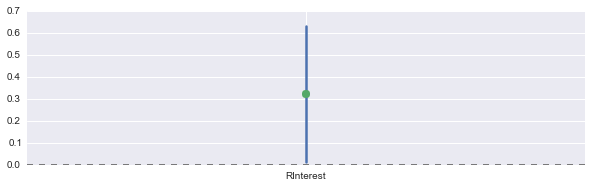

In [13]:
sns.coefplot("Inflation ~ RInterest", data=brazil_ir_s1, intercept=False)

In [44]:
model = ols("Inflation ~ RInterest + 1", brazil_ir_s1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     5.144
Date:                Tue, 05 May 2015   Prob (F-statistic):             0.0426
Time:                        23:10:44   Log-Likelihood:                -30.550
No. Observations:                  14   AIC:                             65.10
Df Residuals:                      12   BIC:                             66.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.8887      1.335      2.912      0.013         0.979     6.798
RInterest      0.3239      0.143      2.268      0.043         0.013     0.635
==============================================================================
Omnibus:                        4.268   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.694
Skew:                           0.727   Prob(JB):                        0.429
Kurtosis:                       3.890   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

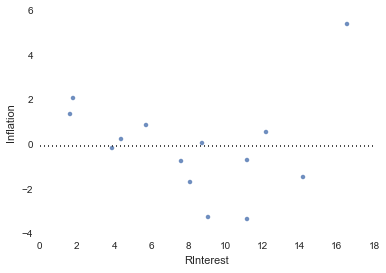

In [51]:
sns.residplot(brazil_ir_s1.RInterest, brazil_ir_s1.Inflation)

In [47]:
model = rlm("Inflation ~ RInterest + 1", brazil_ir_s1).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Robust linear model
==========================================================
Model:              RLM              Df Residuals: 12     
Dependent Variable: Inflation        Norm:         HuberT 
Date:               2015-05-05 23:11 Scale Est.:   mad    
No. Observations:   14               Cov. Type:    H1     
Df Model:           1                Scale:        0.96348
----------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
----------------------------------------------------------
Intercept     5.0359   0.9584 5.2544 0.0000  3.1574 6.9144
RInterest     0.1613   0.1025 1.5739 0.1155 -0.0396 0.3622
==========================================================

"""

In [16]:
brazil_ir_s1.describe()

,GDP,Inflation,Interest,RInterest
count,33.000000,33.000000,14.000000,14.000000
mean,2.759045,355.015623,14.785714,8.283885
std,2.886418,713.659185,4.824673,4.499394
min,-4.233655,3.198592,7.250000,1.641648
25%,0.817012,5.839574,11.062500,4.700772
50%,2.730000,14.715326,14.750000,8.396100
75%,4.920000,225.991556,17.937500,11.146319
max,7.530000,2947.732930,25.000000,16.549779


Note que a **não há evidência estatística** de que taxas de juros maiores provocaram redução da inflação no ano seguinte!

Talvez os efeitos da taxas de juros no Brasil sejam meio retardados... :-)
Vamos verificar para 2 anos de diferença

## Regressão entre taxa de juros e inflação dois anos à frente.

In [17]:
brazil_ir_s2 = brazil.copy()
brazil_ir_s2.Interest = brazil.Interest.shift(2)
brazil_ir_s2.RInterest = brazil.RInterest.shift(2)

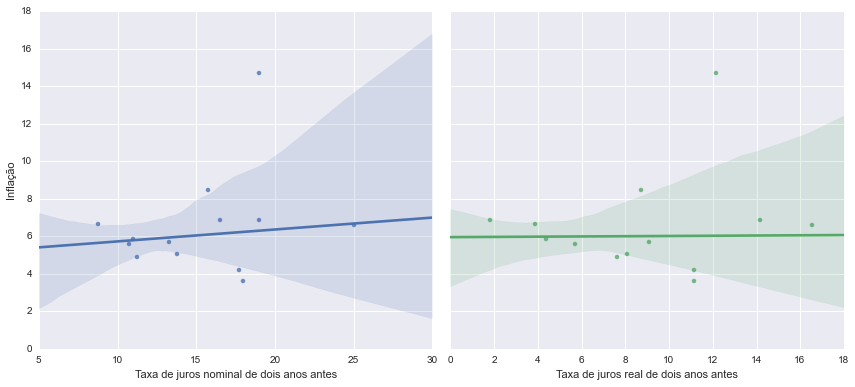

In [18]:

sns.set(style="darkgrid")
color = sns.color_palette()[2]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
sns.regplot(brazil_ir_s2.Interest, brazil_ir_s2.Inflation, robust=True, n_boot=500, ax=ax1)
sns.regplot(brazil_ir_s2.RInterest, brazil_ir_s2.Inflation, robust=True, n_boot=500, ax=ax2).set_ylabel("")
ax1.set_xlabel(u"Taxa de juros nominal de dois anos antes")
ax2.set_xlabel(u"Taxa de juros real de dois anos antes")
ax1.set_ylabel(u"Inflação")

f.tight_layout()

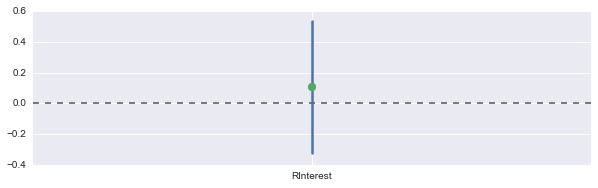

In [19]:
sns.coefplot("Inflation ~ RInterest", data=brazil_ir_s2)

In [52]:
model = ols("Inflation ~ RInterest + 1", brazil_ir_s2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.3036
Date:                Tue, 05 May 2015   Prob (F-statistic):              0.593
Time:                        23:17:30   Log-Likelihood:                -30.974
No. Observations:                  13   AIC:                             65.95
Df Residuals:                      11   BIC:                             67.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.5953      1.881      2.975      0.013         1.456     9.735
RInterest      0.1069      0.194      0.551      0.593        -0.320     0.534
==============================================================================
Omnibus:                       17.364   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.460
Skew:                           1.837   Prob(JB):                      0.00119
Kurtosis:                       6.369   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

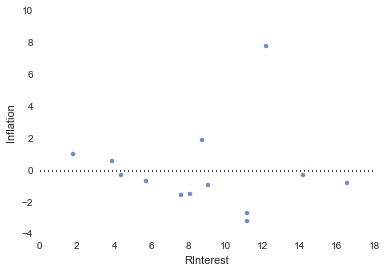

In [53]:
sns.residplot(brazil_ir_s2.RInterest, brazil_ir_s2.Inflation)

In [49]:
model = rlm("Inflation ~ RInterest + 1", brazil_ir_s2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              Inflation   No. Observations:                   13
Model:                            RLM   Df Residuals:                       11
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 05 May 2015                                         
Time:                        23:13:01                                         
No. Iterations:                    17                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.9486      1.294      4.599      0.000         3.413     8.484
RInterest      0.0062      0.133      0.046      0.963        -0.255     0.268
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

## Conclusão

Note que a **não há evidência estatística** de que taxas de juros maiores tenham provocado redução da inflação dois anos após!

*Work in progress*